In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Define Problem**

- Produce a predictive machine learning program that can predict whether a user is going to be promoted or not considering the features have by this Multinational Company, therefore it can ease up the HR Department to faster the determination time; an automation can also reduce human error in manual determination 
- Although this model is purposed to determine whether an employee is to be promoted or not, we cannot conclude the performance of this employee is good or bad generally
- Machine Learning that is going to be used for this project is supervised learning, classification
- Business wise, performance metrics is recall; we want to promote people that really deserve to be promoted, because it is rather a detrimental issue for the company not to promote the deserving ones, and to be more convincing, we would like to plot a cost loss scenario as to what this company would loss if they were to apply this model to the field.
- The risk that is going to be faced by this MNC is that although the performance is acceptable, there always an external issue that can decrease this model performance in the long run, therefore, it is better to watch out for this 'external issue' such as the dynamics of the salary also can be a potential issue considering that a stagnant in a salary in a certain period can decrease one's performance in the company. 


### **Data Understanding**


**Glossary**

Features:

- employee_id: Unique ID for employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_of_trainings: no of other trainings completed in previous year on soft - skills, technical skills etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_of_service: Length of service in years
- awards_won?: if awards won during previous year then 1 else 0
- avg_training_score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

These are the columns of the dataset and the label is is_promoted. We are going to find any correlation between the two and ultimately going to build a model that is suitable for the project's objective.

- Source of data : https://www.kaggle.com/arashnic/hr-ana
- Modified by Möbius (2020)

In [ ]:
df_emp_prom = pd.read_csv('train_emp_prom.csv')
df_emp_prom.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [ ]:
df_emp_prom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
df_emp_prom.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000


# **Exploratory Data Analysis**

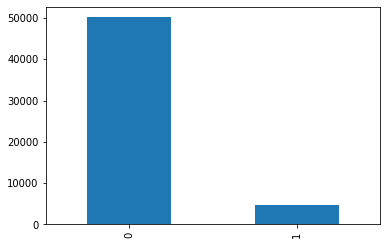

In [ ]:
df_emp_prom['is_promoted'].value_counts().plot(kind='bar')

From the plot above, it can be seen that the class labels are imbalanced

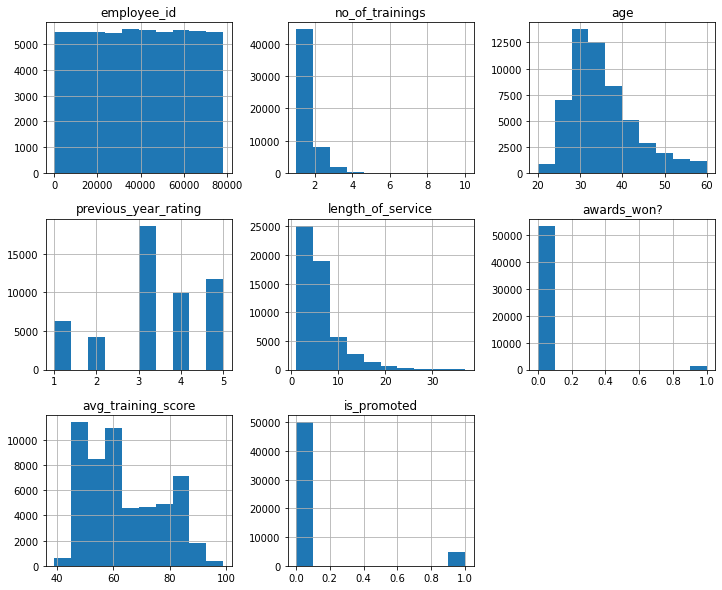

In [ ]:
df_emp_prom.hist(figsize=(12,10));

Overall it can be concluded that the data is not normally distributed

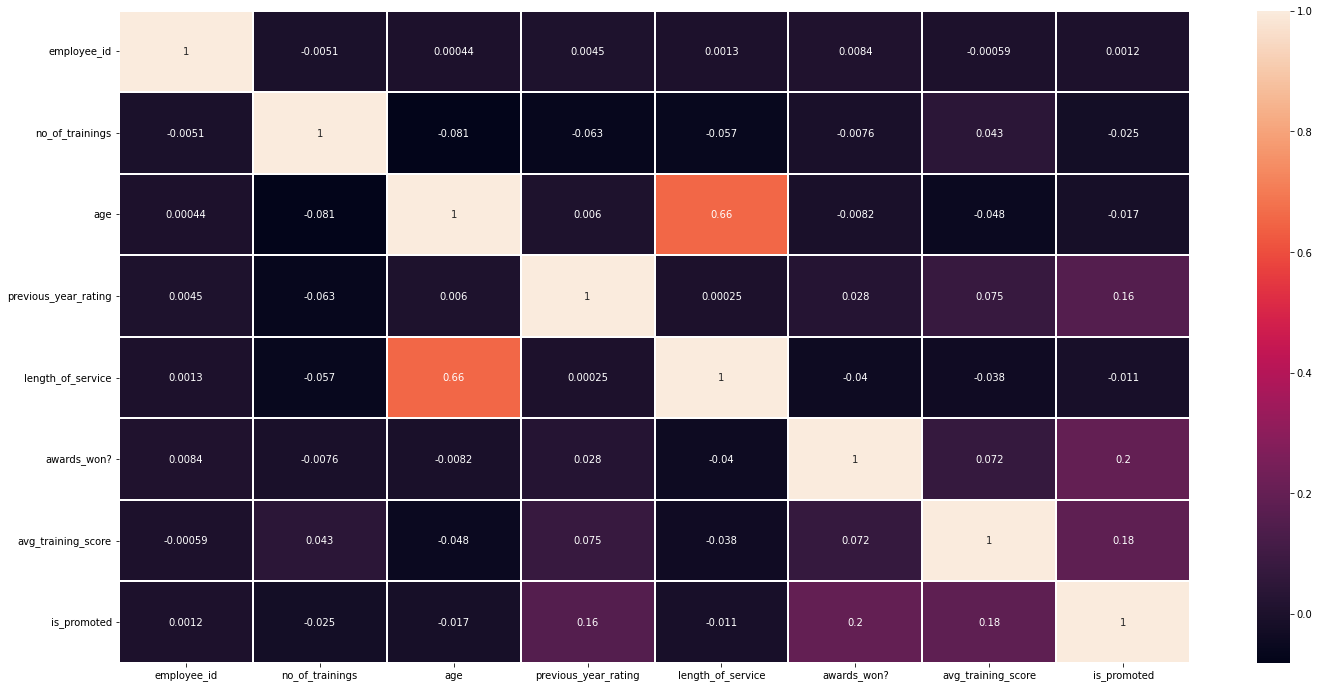

In [ ]:
plt.figure(figsize = (24, 12))
corr = df_emp_prom.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

The correlation number between column with column or features with columns are generally low, also the numeric features are not all continous; some are discrete. Thus, doing another plotting method might better our overlook of the correlations between features and label.

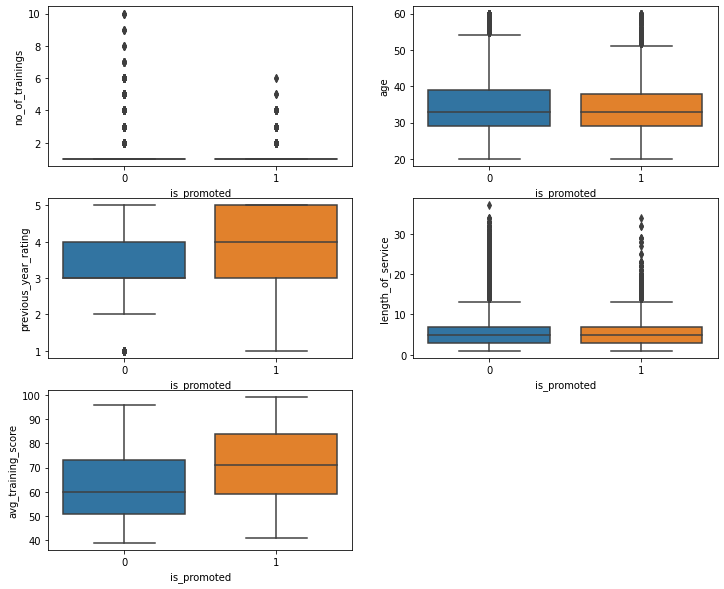

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12,10))
for ix, var in enumerate(['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service','avg_training_score']):
    sns.boxplot(y=var, x='is_promoted', data=df_emp_prom, ax=axes.flatten()[ix])

axes[2][1].remove()

Columns such as **average_training_score** differs the label by their median, min, and max values, and **previous_year_rating** in the promoted label might have a higher rating, and the **age** of the not promoted employee have are older. The column **no_of_trainings** boxplot does not show the spread of the data, hence we might further look into the other plotting method.

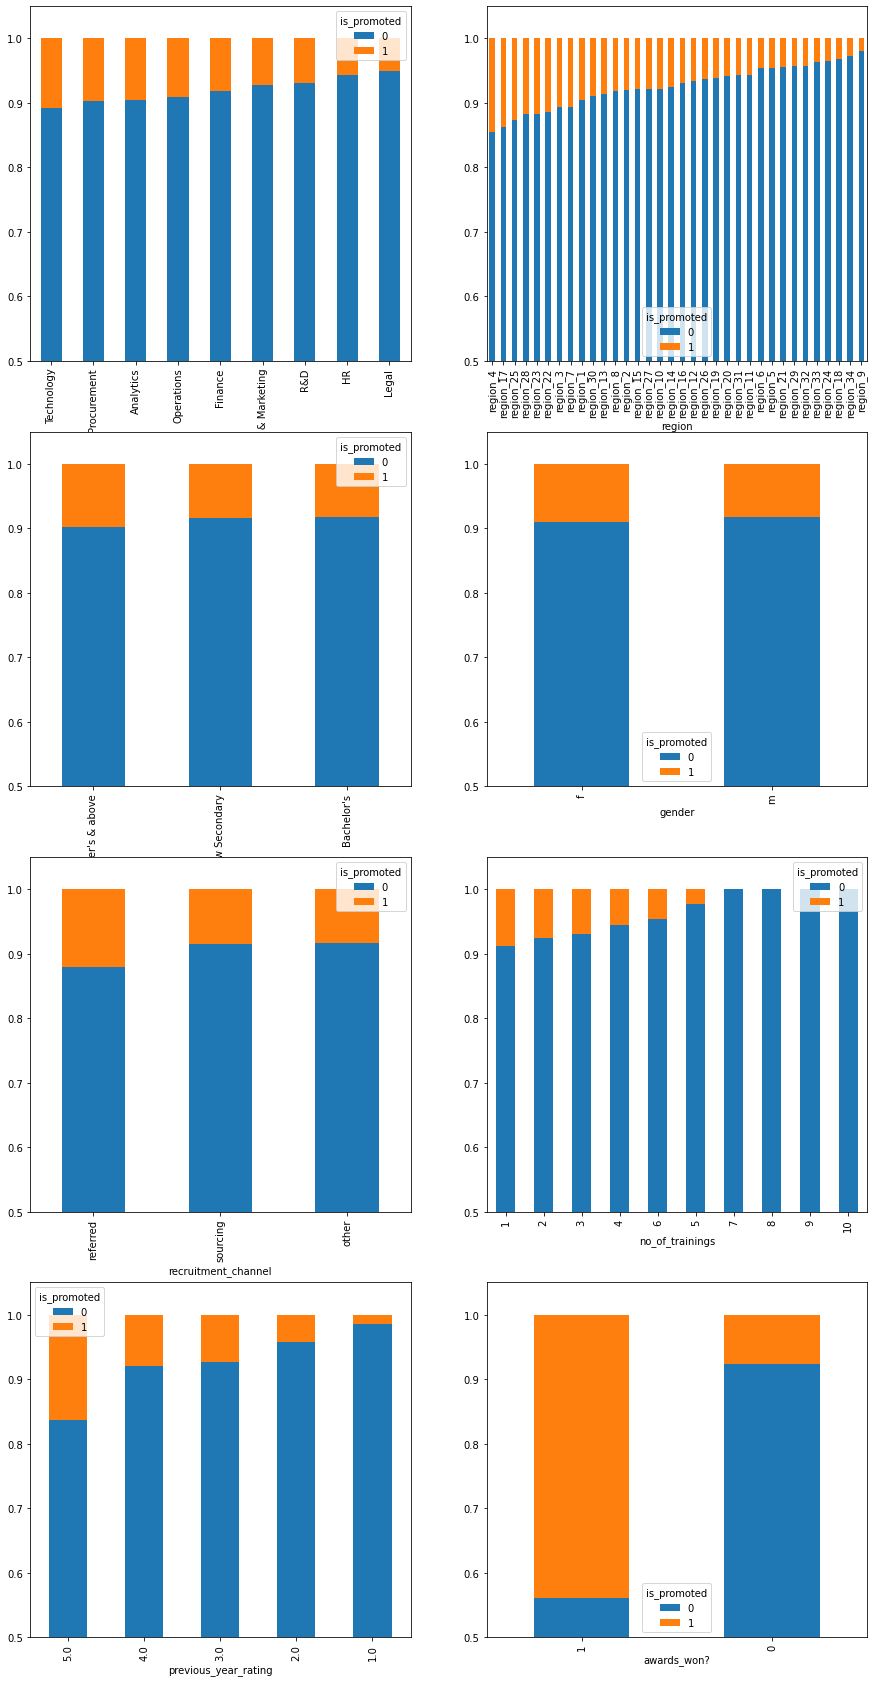

In [ ]:
# https://stackoverflow.com/questions/57453959/how-to-show-percentages-on-the-stacked-bar-chart-in-python-3-x
ctg_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel', 
            'no_of_trainings', 'previous_year_rating', 'awards_won?']

fig, ax = plt.subplots(4,2, figsize=(15,30))
for ix, col in enumerate(ctg_cols):
    df_emp_prom.groupby(col)['is_promoted'].value_counts(normalize=True).unstack(level=1).sort_values(by=1, ascending=False).plot.bar(stacked=True, ax=ax.flatten()[ix], ylim=(0.5))

To get a closer look to the categorical columns, we try to plot the ratio between the promoted and not promoted between the categories in categorical or numerical discrete columns. In the **department** column, the there is a high ratio to be promoted in the technology department compared to other departments. Furthermore, **region** four in the region column also show a larger percentage to be promoted, followed by region 17, and 25, and the least is region 9. Perhaps, if the authors were given more information on the region it would bring a larger outlook on this feature. Thirdly, the **recruitment channel** shows that the employees that are recruited from a referred source are more likely to be promoted rather than sourcing and other source that is not clear enough. The ratio of employees that are promoted from the **number of trainings** data suggest that the more training the less the ratio of an employee to be promoted, as the highest ratio of number of training to be promoted is one. Moreover, the promoted ratio in the **previous year rating** column is higher in employees that have 5 rating, and decreasingly change as the number decrease. But, **education** column also shows that employees that have master's degree and above have a higher ratio to be promoted rather than the other categories. **Gender** column doesn't show any different between the ratio of a male and female employee getting a promotion or not. And lastly, the **awards won** shows that employee that has won an award last year no matter how many, has a higher ratio of getting a promotion in this MNC.

In [ ]:
df_emp_prom[df_emp_prom['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47,0


The null values found in the education column do not have any relationship with other columns. Also, we don't know what impact it may bring to the model performance, thus, we decided to fill the null values in the column as 'not defined'.

In [ ]:
df_emp_prom[df_emp_prom['previous_year_rating'].isna()][['previous_year_rating','length_of_service']]['length_of_service'].unique()

array([1])

The null values found in the previous_year_rating column has only one year of employment in this company, making it clear that the employees that have null values in this column are new employees, thus we fill the null values in the column as 'new employee'

In [ ]:
df_emp_prom.duplicated().sum()

0

We also try to find if there is any duplicated values to hinder any duplication in the employee data

From the above analysis, we will use the previous_year_rating, awards_won?, avg_training_score, no_of_trainings, department, education, age features

# **Data Preprocessing**

The department column, as seen in the EDA has a significant ratio in the Technology category to be promoted in opposite of the rest, thus we would like to group them based on their relationship to technology and not related at all to make a more sense of the model.

In [ ]:
df_emp_prom['department'] = df_emp_prom['department'].apply(lambda x: x if x == 'Technology' else 'Non Technology')

We then bin the age to get a more sense of the age range's impact to the model, and while we still want to get a wise distribution of the data, we then divide the range by the distance of two years.

In [ ]:
# https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut
age_range = ['20-22', '23-25', '26-28', '29-31', '32-34', '35-37', '38-40', '41-43', '44-46', '47-49', 
             '50-52', '53-55', '56-58', '59-61']
age_bins = [20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62]
df_emp_prom['age_bin'] = pd.cut(df_emp_prom['age'], bins=age_bins, labels=age_range, right=False)

We also categorize the previous year rating into groups of above average, average, below average, and a new employee for the null values

In [ ]:
df_emp_prom['rating_range'] = df_emp_prom['previous_year_rating'].apply(
    lambda x: 'Above Average' if x == 5.0 or x == 4.0 else 'Average' if x == 3.0 else 'Below Average' if x == 2.0 or x == 1.0 else 'New Employee')

First, we split the training and test from the dataset to preprocess the data, manually fill the null values as purposed before, onehot-encode the category columns, binary-encode the region column, scale the numeric column, and put it in the column transformer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

onehot_cols = ['department', 'education', 'rating_range', 'age_bin']
num_cols = ['no_of_trainings','avg_training_score']
donothing_col = ['awards_won?']

X = df_emp_prom[onehot_cols + num_cols  + donothing_col]
y = df_emp_prom['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.2, stratify=y)

In [ ]:
X_train['education'].fillna('not_defined', inplace=True)
X_test['education'].fillna('not_defined', inplace=True)

In [ ]:
class DoNothingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.values
    
col_trf = ColumnTransformer([
                             ('enc', OneHotEncoder(), onehot_cols),
                             ('scal', StandardScaler(), num_cols),
                             ('skip', DoNothingTransformer(), donothing_col)
])

col_trf_not_scaled = ColumnTransformer([
                              ('enc', OneHotEncoder(), onehot_cols),
                              ('notscaled', DoNothingTransformer(), num_cols),
                              ('skip', DoNothingTransformer(), donothing_col)
])

# **Model Training**

We choose five models to be compared for our projects; logistic regression for it's simplicity, decision tree for it's easiness to articulate, random forest & xgboost for boosting, svc for it's high accuracy and a decent interpretability

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

log_reg = LogisticRegression(max_iter=3000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=True)

log_reg_pipeline = Pipeline ([
    ('col_transformer', col_trf),
    ('log_reg', log_reg)
])

dt_pipeline = Pipeline ([
    ('col_transformer', col_trf_not_scaled),
    ('dt', dt)
])

rf_pipeline = Pipeline([
    ('col_transformer', col_trf_not_scaled),
    ('rf', rf) 
])

xgb_pipeline = Pipeline([
    ('col_transformer', col_trf),
    ('xgb', xgb) 
])

svm_pipeline = Pipeline([
    ('col_trf', col_trf),
    ('svm', SVC()) 
])

# **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

df_bfr_smotenc = pd.DataFrame(columns=['model','train_accuracy','test_accuracy','train_precision','test_precision','train_recall','test_recall','train_f1','test_f1'])
for pipe in ([log_reg_pipeline, dt_pipeline, xgb_pipeline, rf_pipeline, svm_pipeline]):
    pipe.fit(X_train[onehot_cols+num_cols+donothing_col], y_train)
    y_train_pred = pipe.predict(X_train[onehot_cols+num_cols+donothing_col])
    y_test_pred = pipe.predict(X_test[onehot_cols+num_cols+donothing_col])
    df_bfr_smotenc = df_bfr_smotenc.append({
        'model':pipe.named_steps[list(pipe.named_steps.keys())[1]].__class__.__name__,
        'train_accuracy':str(accuracy_score(y_train, y_train_pred)),
        'test_accuracy':str(accuracy_score(y_test, y_test_pred)),
        'train_precision':str(precision_score(y_train, y_train_pred)),
        'test_precision':str(precision_score(y_test, y_test_pred)),
        'train_recall':str(recall_score(y_train, y_train_pred)),
        'test_recall':str(recall_score(y_test, y_test_pred)),
        'train_f1':str(f1_score(y_train, y_train_pred)),
        'test_f1':str(f1_score(y_test, y_test_pred))
    }, ignore_index=True)
    
df_bfr_smotenc

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogisticRegression,0.9189891894357524,0.9181718664477285,0.7286432160804021,0.7032967032967034,0.07766470273165506,0.06852248394004283,0.1403678606001936,0.12487804878048783
1,DecisionTreeClassifier,0.937440131368882,0.916256157635468,0.9583718778908418,0.527972027972028,0.2774504552758436,0.16167023554603854,0.4303219106957425,0.24754098360655738
2,XGBClassifier,0.9257400903161064,0.9251049078635285,0.8494152046783626,0.8228571428571428,0.15559721478307445,0.15417558886509636,0.2630149388863739,0.25969341749323716
3,RandomForestClassifier,0.937440131368882,0.9166210545520891,0.9174389216512215,0.5331125827814569,0.29164434922335297,0.17237687366167023,0.4425929689087584,0.2605177993527508
4,SVC,0.921726041144004,0.9219120598430943,0.8629807692307693,0.90625,0.09614354579539368,0.09314775160599571,0.17301204819277108,0.16893203883495142


Models such as decision tree, XGB, random forest, and SVM tend to be more overfitting the model's performance compared to the logistic regression model since it has a wider range between the training's performance, and the test's performance. We decided to further hyperparameter tune the logistic regression model.

# **Hyperparameter Tuning**

In [ ]:
# https://www.kaggle.com/eikedehling/exploring-class-imbalance-resampling-and-weights

from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 21)

param_grid = {
    'log_reg__penalty':['l1', 'l2', 'none'],
    'log_reg__fit_intercept':[True, False],
    'log_reg__C':[0.01, 0.1, 1.0],
    'log_reg__class_weight':[{0: x, 1: 1.0-x} for x in weights]
}

grid_search = GridSearchCV(estimator=log_reg_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(transformers=[('enc',
                                                                         OneHotEncoder(),
                                                                         ['department',
                                                                          'education',
                                                                          'rating_range',
                                                                          'age_bin']),
                                                                        ('scal',
                                                                         StandardScaler(),
                                                                         ['no_of_trainings',
                                                                          'avg_training_score']),
                                     

In [ ]:
#retrain the best tuned model
log_reg_best = grid_search.best_estimator_
log_reg_best.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('enc', OneHotEncoder(),
                                                  ['department', 'education',
                                                   'rating_range', 'age_bin']),
                                                 ('scal', StandardScaler(),
                                                  ['no_of_trainings',
                                                   'avg_training_score']),
                                                 ('skip',
                                                  DoNothingTransformer(),
                                                  ['awards_won?'])])),
                ('log_reg',
                 LogisticRegression(C=0.01, class_weight={0: 0.14, 1: 0.86},
                                    fit_intercept=False, max_iter=3000,
                                    penalty='none'))])

In [ ]:
# evaluate after tuning
y_train_pred = log_reg_best.predict(X_train)
print('Training')
print('Accuracy: ' + str(accuracy_score(y_train, y_train_pred)))
print('Precision: ' + str(precision_score(y_train, y_train_pred)))
print('Recall: ' + str(recall_score(y_train, y_train_pred)))
print('F1-score: ' + str(f1_score(y_train, y_train_pred)))
print('---------')
y_test_pred = log_reg_best.predict(X_test)
print('Test')
print('Accuracy: ' + str(accuracy_score(y_test, y_test_pred)))
print('Precision: ' + str(precision_score(y_test, y_test_pred)))
print('Recall: ' + str(recall_score(y_test, y_test_pred)))
print('F1-score: ' + str(f1_score(y_test, y_test_pred)))

Training
Accuracy: 0.8338046800164212
Precision: 0.23337835809695331
Recall: 0.4164434922335297
F1-score: 0.299124747523324
---------
Test
Accuracy: 0.8358876117496807
Precision: 0.23318938926588526
Recall: 0.40471092077087795
F1-score: 0.2958904109589041


After having hyperparameter tune does not enhance the model performance, we decided the class imbalance has a contribution for that, so we would like to try random sampling the training dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


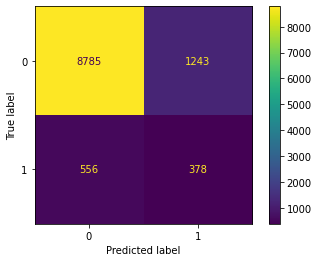

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg_best, X_test, y_test)

# **Oversampling using SMOTENC**

In [ ]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC(categorical_features=[0,1,2,3,6], random_state=22, sampling_strategy=4/5)

X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

In [ ]:
df_aftr_smotenc = pd.DataFrame(columns=['model','train_accuracy','test_accuracy','train_precision','test_precision','train_recall','test_recall','train_f1','test_f1'])
for pipe in ([log_reg_pipeline, dt_pipeline, xgb_pipeline, rf_pipeline, svm_pipeline]):
    pipe.fit(X_train_smotenc, y_train_smotenc)
    y_train_pred = pipe.predict(X_train_smotenc)
    y_test_pred = pipe.predict(X_test[onehot_cols+num_cols+donothing_col])
    df_aftr_smotenc = df_aftr_smotenc.append({
        'model':pipe.named_steps[list(pipe.named_steps.keys())[1]].__class__.__name__,
        'train_accuracy':str(accuracy_score(y_train_smotenc, y_train_pred)),
        'test_accuracy':str(accuracy_score(y_test, y_test_pred)),
        'train_precision':str(precision_score(y_train_smotenc, y_train_pred)),
        'test_precision':str(precision_score(y_test, y_test_pred)),
        'train_recall':str(recall_score(y_train_smotenc, y_train_pred)),
        'test_recall':str(recall_score(y_test, y_test_pred)),
        'train_f1':str(f1_score(y_train_smotenc, y_train_pred)),
        'test_f1':str(f1_score(y_test, y_test_pred))
    }, ignore_index=True)
    
df_aftr_smotenc

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogisticRegression,0.6790903173086246,0.735632183908046,0.6573737516321417,0.1684672518568535,0.5805104552962074,0.5342612419700214,0.6165557872439016,0.25616016427104726
1,DecisionTreeClassifier,0.7783133197601141,0.7333515781791644,0.7474840734927523,0.14771519659936239,0.7568948860980398,0.4464668094218415,0.752160044594469,0.22198562682991746
2,XGBClassifier,0.6926496862924336,0.7995803685458858,0.7101307744565217,0.20586865393572426,0.5212066440213157,0.4732334047109208,0.6011753922467246,0.2869198312236287
3,RandomForestClassifier,0.7782440686417086,0.7319832147418355,0.7423721659430776,0.1506276150627615,0.7673346006419646,0.4625267665952891,0.7546470110486232,0.22724881641241454
4,SVC,0.70057201423803,0.7750410509031199,0.6987924356345409,0.1863226863226863,0.5734675433949329,0.487152034261242,0.6299573797990518,0.26954976303317535


TypeError: ignored

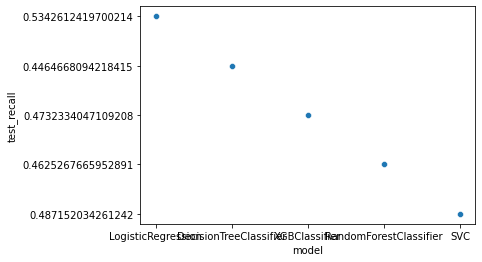

In [ ]:

sns.scatterplot(x='model',y='test_recall',data=df_aftr_smotenc)
plt.xticks(30)

After SMOTENC, models such as decision tree, XGB, random forest, and SVC still give us an overfitting performance. On the other hand, logistic regression gives a more stable condition; do not have a wide range between training and test model's performances, and thus we tune the logistic regression model.

# **Tuning After Oversampling**

In [ ]:
from sklearn.model_selection import GridSearchCV
weights = np.linspace(0.05, 0.95, 21)

param_grid = {
    'log_reg__penalty':['l1', 'l2', 'none'],
    'log_reg__fit_intercept':[True, False],
    'log_reg__C':[0.01, 0.1, 1.0],
    'log_reg__class_weight':[{0: x, 1: 1.0-x} for x in weights]
}

grid_search = GridSearchCV(estimator=log_reg_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_smotenc, y_train_smotenc)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(transformers=[('enc',
                                                                         OneHotEncoder(),
                                                                         ['department',
                                                                          'education',
                                                                          'rating_range',
                                                                          'age_bin']),
                                                                        ('scal',
                                                                         StandardScaler(),
                                                                         ['no_of_trainings',
                                                                          'avg_training_score']),
                                     

In [ ]:
#retrain the best tuned model
log_reg_smotenc_best = grid_search.best_estimator_
log_reg_smotenc_best.fit(X_train_smotenc, y_train_smotenc)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('enc', OneHotEncoder(),
                                                  ['department', 'education',
                                                   'rating_range', 'age_bin']),
                                                 ('scal', StandardScaler(),
                                                  ['no_of_trainings',
                                                   'avg_training_score']),
                                                 ('skip',
                                                  DoNothingTransformer(),
                                                  ['awards_won?'])])),
                ('log_reg',
                 LogisticRegression(C=0.1,
                                    class_weight={0: 0.32,
                                                  1: 0.6799999999999999},
                                    max_iter=3000))])

In [ ]:
#evaluate after tuning

y_train_pred = log_reg_smotenc_best.predict(X_train_smotenc)
print('Training')
print('Accuracy: ' + str(accuracy_score(y_train_smotenc, y_train_pred)))
print('Precision: ' + str(precision_score(y_train_smotenc, y_train_pred)))
print('Recall: ' + str(recall_score(y_train_smotenc, y_train_pred)))
print('F1-score: ' + str(f1_score(y_train_smotenc, y_train_pred)))
print('---------')
y_test_pred = log_reg_smotenc_best.predict(X_test)
print('Test')
print('Accuracy: ' + str(accuracy_score(y_test, y_test_pred)))
print('Precision: ' + str(precision_score(y_test, y_test_pred)))
print('Recall: ' + str(recall_score(y_test, y_test_pred)))
print('F1-score: ' + str(f1_score(y_test, y_test_pred)))

Training
Accuracy: 0.6321519092533344
Precision: 0.5549352300723198
Recall: 0.8704228863473464
F1-score: 0.6777641620460805
---------
Test
Accuracy: 0.47755883962780515
Precision: 0.12074695363190378
Recall: 0.816916488222698
F1-score: 0.2103956983317248


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


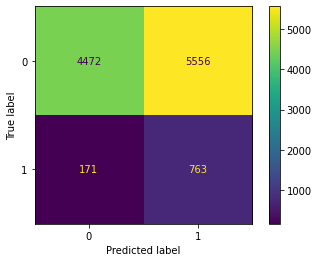

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg_smotenc_best, X_test, y_test)

From the figure above, we get values for the model's prediction compared to the real value. For a further model performance evalution, we would like to look at the company's probable loss's cost.

According to https://www.businessnewsdaily.com/8101-asking-for-a-raise-tips.html, typically a promotion in a company has a 3% rate, but it's acceptable to request a raise in the 10% to 20% range, so in this case we will use 20% rate. We can say that the company will lose a certain amount to pay an employee without a significant raise in the company's performance considering that the employee does not deserve to be promoted.

On the other hand, if an employee is not to be promoted in a certain amount of time considering their performance, according to https://smallbusiness.chron.com/employees-motivated-promotions-20173.html, 29% of the employees will look for other companies to move. Thus, if we mis-predict an employee 'not-promoted' although they actually has to be promoted, we might lose a 29% valuable asset to the company that might increase the company's performance

In [ ]:
df_prediction = pd.DataFrame(
    np.concatenate(
        [X_test, y_test.values.reshape(-1,1), y_test_pred.reshape(-1,1)
        ], axis=1)).rename(columns={0:'department',
                                   1:'education',
                                   2:'previous_year_rating',
                                   3:'region',
                                   4:'no_of_trainings',
                                   5:'avg_training_score',
                                   6:'awards_won',
                                   7:'is_promoted_actual',
                                   8:'is_promoted_prediction'})

In [ ]:
df_prediction['correct_prediction'] = df_prediction['is_promoted_actual'] == df_prediction['is_promoted_prediction']

In [ ]:
df_prediction

,department,education,previous_year_rating,region,no_of_trainings,avg_training_score,awards_won,is_promoted_actual,is_promoted_prediction,correct_prediction
0,Non Technology,Bachelor's,Average,32-34,1,58,1,1,1,True
1,Non Technology,Bachelor's,Above Average,32-34,1,49,0,0,1,False
2,Technology,Bachelor's,Above Average,29-31,1,77,0,1,1,True
3,Non Technology,Bachelor's,Average,41-43,1,54,0,0,0,True
4,Technology,Bachelor's,Above Average,32-34,1,76,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...
10957,Non Technology,Bachelor's,Above Average,32-34,1,50,1,0,1,False
10958,Non Technology,Bachelor's,Average,29-31,1,50,0,0,0,True
10959,Non Technology,Bachelor's,Above Average,35-37,1,54,0,0,1,False
10960,Non Technology,Bachelor's,Above Average,29-31,3,61,0,0,0,True


In [ ]:
df_prediction[(df_prediction['is_promoted_prediction'] == 1)&
             (df_prediction['correct_prediction'] == False)]['education'].value_counts()

Bachelor's          3825
Master's & above    1612
not_defined           63
Below Secondary       56
Name: education, dtype: int64

Above is false positive from the test dataset in education feature, and the values of each categories in it

In [ ]:
df_prediction[(df_prediction['is_promoted_prediction'] == 0)&
             (df_prediction['correct_prediction'] == False)]['education'].value_counts()

Bachelor's          107
Master's & above     44
not_defined          14
Below Secondary       6
Name: education, dtype: int64

Above is false negative from the test dataset in education feature, and the values of each categories in it

From the falsely predicted datas that this model predicted in the dataset, we would like to create a cost loss scenario that would happen to this company that this model would help this company to an automation of company's employees promotion.


According to https://mint.intuit.com/blog/salary/what-is-a-good-salary/, this is an average salary for US Employee by Education:
- bachelor: 64,896 dollar (annually)
- master: 77,844 dollar (annually)
- not_defined (we use High school diploma): 38,792 dollar (annually)
- below secondary: 30,784 dollar (annually)


- salary increases: 20%
- prediction of employees who resign: 29%


So here are the calculations we have made:

**False Positive**
- bachelor: 3825 x 0.2 x 64,896 = 49,645,440
- master: 1612 x 0.2 x 77,844 = 25,096,905.6
- not_defined: 63 x 0.2 x 38,732 = 488,023.2
- below secondary: 56 x 0.2 x 30,784 = 344,780.8
- total: 75,575,149.6 dollar

**False Negative**
- bachelor: 107 x 0.29 x 64,896 = 2,013,722.88
- master: 44 x 0.29 x 77,844 = 993,289.44
- not_defined: 14 x 0.29 x 38,732 = 157,251.92
- below secondary: 6 x 0.29 x 30,784 = 53,564.16
- total: 3,217,828.4 dollar

In [ ]:
pred_proba = log_reg_smotenc_best.predict_proba(X_train_smotenc)[:,1].tolist()
pred_proba_df = pd.DataFrame({
    'pred_proba': pred_proba
})
percentage_df = pred_proba_df['pred_proba'].apply(lambda x: '70-100%' if x>=0.7 else '40-69%' if x<=0.69 and x>=0.4 else '0-39%').value_counts().reset_index().rename(columns={'index':'pred_proba_percentage','pred_proba':'num_of_emp'}).sort_values(by='pred_proba_percentage', ascending=False)
percentage_df['percentage'] = percentage_df['num_of_emp'].apply(lambda x: '{:.2f} %'.format(x/pred_proba_df.shape[0]*100))
percentage_df['probable_condition'] = percentage_df['pred_proba_percentage'].apply(lambda x: 'HR Interview' if x=='70-100%' else 'Asessment' if x=='40-69%' else 'Candidate')
percentage_df

,pred_proba_percentage,num_of_emp,percentage,probable_condition
1,70-100%,25406,35.19 %,HR Interview
0,40-69%,31477,43.60 %,Asessment
2,0-39%,15318,21.22 %,Candidate


From the dataframe above we can manage to reach an information that there are numbers of employee that have certain probability numbers to be promoted. This information can be used to ease the HR Department job for promotion determination. For starters, it costs about  0.93 dollars to have a test for a candidate according to https://www.testgorilla.com/pricing/, thus with 25406 employees that have above seventy percent probability to be promoted, we can save cost around 23627.58 dollars because they can go straight to interview with HR. Along with other numbers, the 31477 employees that have 40-69% probability can have an asessment, that according to the site an assesment per employee costs about 121.6 dollars, managing to safe company's funds about 3.829.701 dollars. And lastly, we can focus on the rest (0-39% probability to be promoted) to be grouped as a candidate to be assesed and look up their features that align with the coefficient to be not promoted, and re-evaluate them for next period for promotion or cut-off from the company.

In [ ]:
# get feature columns & coefficients

onehot_cols_feature = log_reg_smotenc_best.named_steps.col_transformer.named_transformers_.enc.get_feature_names().tolist()
feature_cols = onehot_cols_feature + num_cols + donothing_col
coef = log_reg_smotenc_best.named_steps.log_reg.coef_.reshape(-1).tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


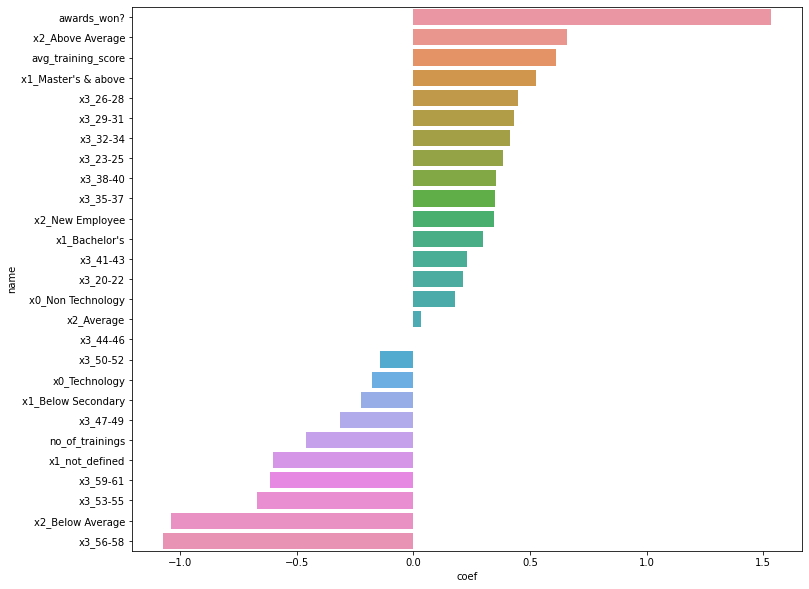

In [ ]:
# get feature importance
df_feature_importance = pd.DataFrame({
    'name': feature_cols,
    'coef': coef
})

plt.figure(figsize=(12,10))
sns.barplot(x='coef', y='name', data=df_feature_importance.sort_values(by='coef', ascending=False))

From the figure above we can see all the contributing factors to the model's work derived from the coefficient. The feature awards won has the largest contributing factor whether an employee is to be promoted or not, followed by whether the employee has above average and average training score.  For the highest coefficient age range to be promoted is in the range of 26-28, a productive phase of an employee. But, the opposite is, feature with the lowest coefficient to be promoted is if an employee is 56-58 years old, followed by below average and 53-55 years old.

From the features above we can manage also the employees with features with high coefficient to be promoted, and the low coefficient not to be promoted. 

# **Result**

After having a thorough look of this project, we would like to conclude that this project is an eye-opener to the industry life condition. There are many  imbalances between the promoted and not promoted in a company, preferably to the not promoted, and also the prediction model can be evaluated by a probable cost loss for the company, and determined to be used. 

The model coefficients however, gives a positive insight for the HR to predict whether an employee is to be promoted or not, and to give a promotion more wisely.

This model's coefficient to their classification has a high alignment to us author's domain knowledges. Perhaps when determining a promotion candidate, the HR Department can further use this model's consideration, considering it's recall performance. Further works such as deep learning can also boost this prediction project performance, can also speed up automation of promotion determination in this company.

For further business use, we also include a scenario containing employees data that have a high probability chance to be promoted in this data, giving HR as the business user to evaluate the data, and take action such as giving the high probability employees to be promoted to go straight to HR interview, managing the company safe some few bucks of their funds.

Also, to evaluate the employees with low probability to be promoted, we can use this data to re-evaluate them in next period whether to keep them or cut them off

A more thorough feature engineering can also be done to enhance the model's performance. Current features such as region is impactful to the model but also not clear enough whether the region has another feature to explain their impact to the model.
